<h2><font color="#004D7F" size=6>Como Comparar Diferentes Algoritmos</font></h2>
<div style="text-align: right">
<font color="#004D7F" size=3>@ingandresgamer</font><br>
<font color="#004D7F" size=3>Clasificadores con Python</font><br>

# Comparación del Desempeño de Algortimos

Vamos a comparar el desempeño de 3 algoritmos de clasificación, empleando la misma base de datos 

* Logistic Regression.
* Classification Trees. 
* Support Vector Machines.

El código mostrará:
* Una lista de cada nombre corto de algoritmo, el accuracy promedio y  la desviación estándar.
* Un diagrama de Bigote que muestra la distribución del  accuracy en cada fold de validación cruzada para cada algoritmo.

El dataset que utilizaremos es de <a href="https://www.kaggle.com/">Kaggle</a>, un gran lugar para conseguir datasets para tus estudios en ciencia de datos e inteligencia artificial.

El dataset es sobre diabetes. Debes descargarlo <a href="https://www.kaggle.com/mathchi/diabetes-data-set">Aqui</a>  en Kaggle. El objetivo de este dataset es predecir, dada otra información médica, si alguien tiene la enfermedad

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [6]:
# Leer y Cargar el Archivo 
df = pd.read_csv("db/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df['Outcome']=df['Outcome'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [12]:
## Separar los Datos en Salida Y y en Nuestras Caracteristicas X
Y=df['Outcome']
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [26]:
##  Comparar los Algoritmos

models =[] ## Se Crea una Lista para salvar los modelos

models.append(('Regresión Logistica',LogisticRegression(solver='lbfgs',max_iter=1000)))
models.append(('Arbol de Desición',DecisionTreeClassifier(random_state=88)))
models.append(('Maquina de Soporte Vectorial Lineal',SVC(C=0.01,kernel='linear')))
models.append(('Maquina de Soporte Vectorial RBF',SVC(C=0.01,kernel='rbf')))

results=[]
names=[]
scoring='recall'
kfold= KFold(n_splits=8,random_state=87,shuffle=True)

for name, model in models : 
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    print(f'{name} : {cv_result.mean():.2%} ({cv_result.std():.2%})')
    

Regresión Logistica : 56.19% (10.16%)
Arbol de Desición : 53.95% (7.43%)
Maquina de Soporte Vectorial Lineal : 56.84% (9.91%)
Maquina de Soporte Vectorial RBF : 0.00% (0.00%)


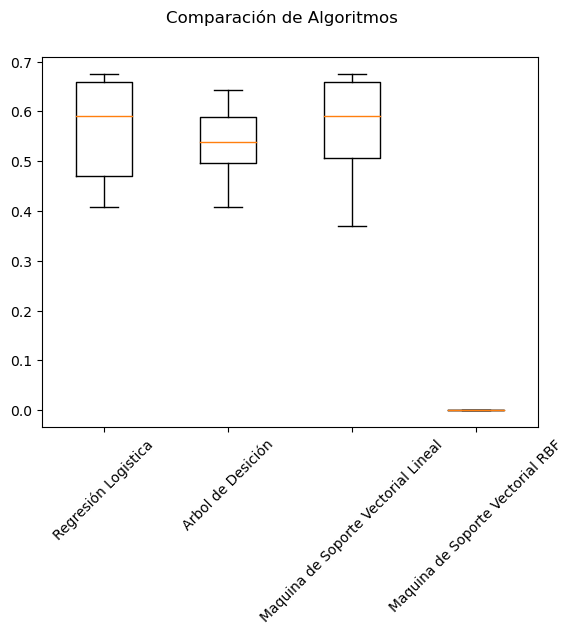

In [27]:
fig=plt.figure()
fig.suptitle('Comparación de Algoritmos')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.show()